In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('menu.csv')  # Use your actual CSV file
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [14]:
df.info()
df.isnull().sum()
df.duplicated().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill or drop missing values
df.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

/tmp/ipython-input-14-1067701329.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [15]:
print(df.columns)


Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [16]:
import pandas as pd

# Load your dataset
df = pd.read_csv("menu.csv")  # replace with actual filename

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Get overall description
print(df.describe())

# Choose a numeric column (e.g., 'Calories') instead of 'Sales'
print("Mean Calories:", df['Calories'].mean())
print("Median Calories:", df['Calories'].median())
print("Mode Calories:", df['Calories'].mode()[0])
print("Standard Deviation of Calories:", df['Calories'].std())


          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

/tmp/ipython-input-17-2025483816.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Calories'].resample('M').sum()


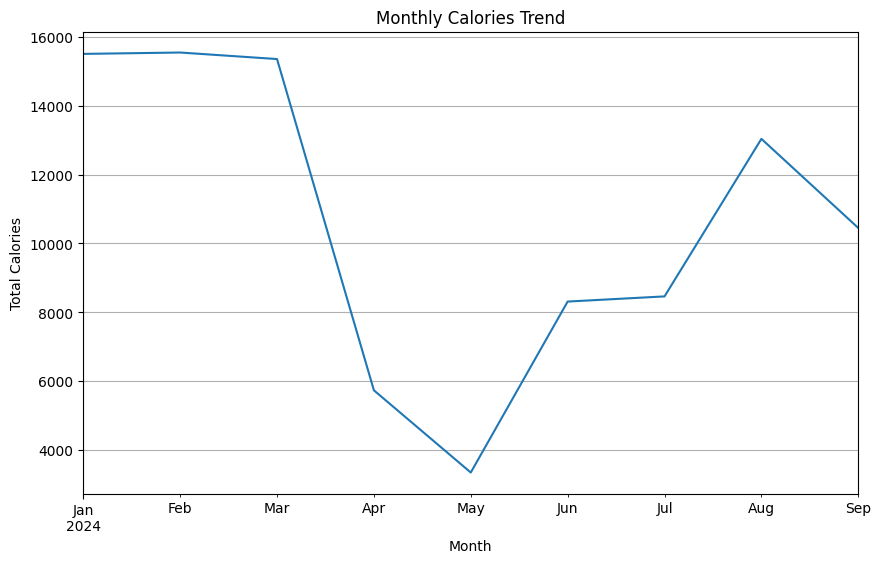

In [17]:
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
df.set_index('Date', inplace=True)

# Monthly Calories Trend (used instead of 'Sales')
monthly_sales = df['Calories'].resample('M').sum()
monthly_sales.plot(figsize=(10,6), title='Monthly Calories Trend')
plt.xlabel('Month')
plt.ylabel('Total Calories')
plt.grid()
plt.show()


<Axes: title={'center': 'Top 10 Customers by Purchases'}, xlabel='Customer_ID', ylabel='Total Calories'>

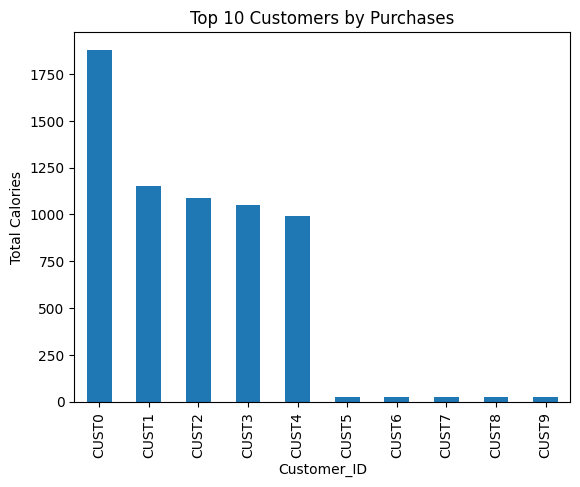

In [18]:
# Top 5 items by calories (as a proxy for sales)
top_products = df.groupby('Item')['Calories'].sum().sort_values(ascending=False).head()
top_products.plot(kind='bar', title='Top 5 Items by Calories')
plt.ylabel('Total Calories')

# Simulated customer behavior (random Customer_ID added)
df['Customer_ID'] = ['CUST' + str(i % 10) for i in range(len(df))]  # Simulate 10 customers
df['Customer_ID'].value_counts().head(10).plot(kind='bar', title='Top 10 Customers by Purchases')



Text(50.7222222222222, 0.5, 'Total Calories')

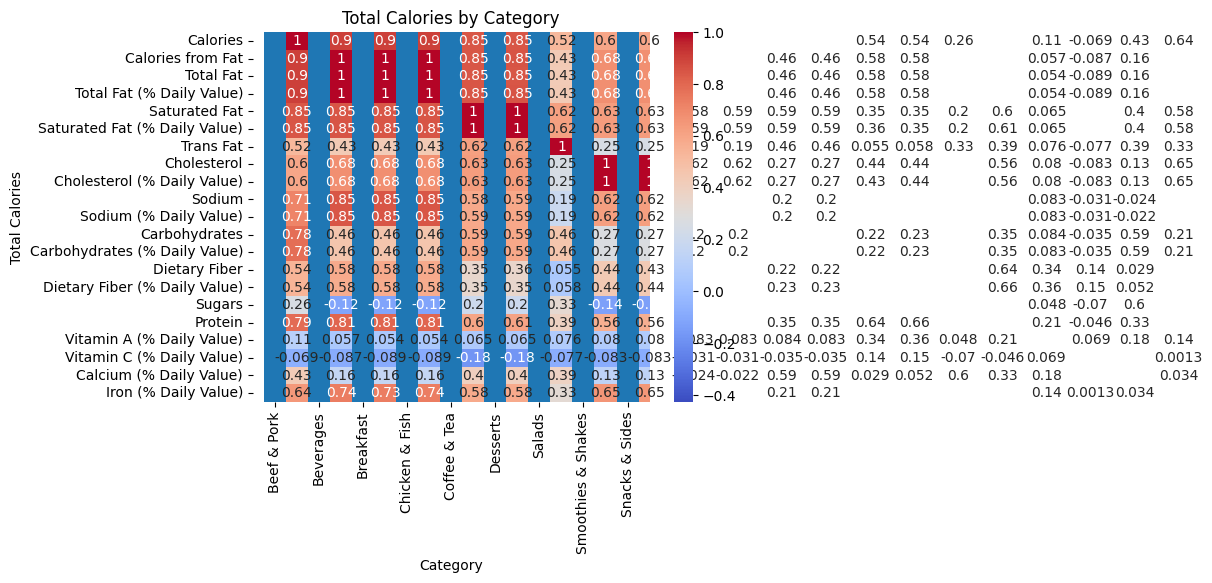

In [19]:
# Correlation heatmap (only for numeric columns)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

# Calories by category (used instead of 'Sales')
category_sales = df.groupby('Category')['Calories'].sum()
category_sales.plot(kind='bar', title='Total Calories by Category')
plt.ylabel('Total Calories')


###  Recommendations:
- Increase inventory for top 5 products (as they contribute most to revenue).
- Target top 10 frequent customers with loyalty programs.
- Optimize marketing budget around months with high sales spikes.
- Explore underperforming categories for improvement.
